In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
all_vars = ['Cars_Count', 'Sex', 'Is_Driver', 'Is_Own_House',
            
            'Age', 'Education', 'Total_IN', 'Area', 'Members_Count','Family_Region','Career_Code',
            
            'SumCost','Departure_Time','Arrival_Time', 'trip_time', 'distance', 'Departure_longitude', 'Departure_latitude',
            'Destination_longitude', 'Destination_latitude',
            
            'Dayoff_Mon', 'Dayoff_Sat', 'Dayoff_Sun']
# 'Dayoff_Mon', 'Dayoff_Tue', 'Dayoff_Wed','Dayoff_Thur', 'Dayoff_Fri', 'Dayoff_Sat', 'Dayoff_Sun'


mode_columns = ["Mode_Walk", "Mode_Bus", "Mode_Subway", "Mode_Taxi", "Mode_Car", "Mode_Custom_Bus_or_Shared_Car"]

purpose_columns = ["Purpose_Work", "Purpose_School", "Purpose_Home", "Purpose_Shopping",
                   "Purpose_Entertainment",  "Purpose_Travel_or_Business_Trip", "Purpose_Take_Others"]

all_vars_cn = ['有小汽车', '性别', '有驾驶证', '自有房屋', '年龄', '文化水平', '家庭年收入', '住房面积', '家庭成员数量','行政区划',
               '职业','出行费用','出发时间','到达时间', '出行时间', '出行距离', '出发地经度', '出发地纬度','目的地经度', '目的地纬度',
               '工作日休息','周六休息', '周末休息']
# '周一休息', '周二休息', '周三休息','周四休息', '周五休息', '周六休息', '周日休息'

mode_columns_cn = ['步行','公共汽车','地铁轻轨','出租车或网约车','私家车','定制公交或共享汽车']

purpose_columns_cn = ['上班','上学','回家','购物','娱乐','旅游或出差','接送家人']

In [3]:
df = pd.read_csv("data/DL_data_final_non_standard.csv")[all_vars]
prediction = pd.read_csv("data/DL_data_final_non_standard.csv")[['MainTransport','Travel_Purpose']]

path = os.getcwd()
if not os.path.exists(path+'\\image'):os.makedirs(path+'\\image')
if not os.path.exists(path+'\\image\\corr'):os.makedirs(path+'\\image\\corr')
    
df.describe()

,Cars_Count,Sex,Is_Driver,Is_Own_House,Age,Education,Total_IN,Area,Members_Count,Family_Region,...,Arrival_Time,trip_time,distance,Departure_longitude,Departure_latitude,Destination_longitude,Destination_latitude,Dayoff_Mon,Dayoff_Sat,Dayoff_Sun
count,71331.000000,71331.000000,71331.000000,71331.000000,71331.000000,71331.000000,71331.000000,71331.000000,71331.000000,71331.000000,...,71331.000000,71331.000000,71331.000000,71331.000000,71331.000000,71331.000000,71331.000000,71331.000000,71331.000000,71331.000000
mean,0.696107,0.511909,0.475502,0.914259,39.125527,1.250831,15.850857,92.002916,2.696163,4.201329,...,12.459729,30.044539,19.437807,121.730740,39.060440,121.731656,39.061077,0.139897,0.677532,0.743155
std,0.459940,0.499862,0.499403,0.279983,16.660476,0.887679,9.436216,25.421318,0.860735,2.431336,...,4.879824,25.186127,35.585254,0.344453,0.245024,0.345138,0.245687,0.346883,0.467424,0.436896
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,7.500000,50.000000,1.000000,0.000000,...,0.166667,0.000000,0.100255,121.125817,38.734641,121.125817,38.730784,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,35.000000,0.000000,7.500000,70.000000,2.000000,3.000000,...,8.000000,15.000000,1.510050,121.558661,38.912911,121.558909,38.912940,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,38.000000,1.000000,15.000000,90.000000,3.000000,3.000000,...,10.250000,25.000000,4.667080,121.622608,38.976093,121.623521,38.976155,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,45.000000,2.000000,25.000000,120.000000,3.000000,6.000000,...,17.500000,40.000000,16.250500,121.779962,39.069874,121.781330,39.069999,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,50.000000,150.000000,6.000000,10.000000,...,23.983333,300.000000,264.964996,123.451204,40.150461,123.451204,40.150461,1.000000,1.000000,1.000000


# Mode & Variables corr

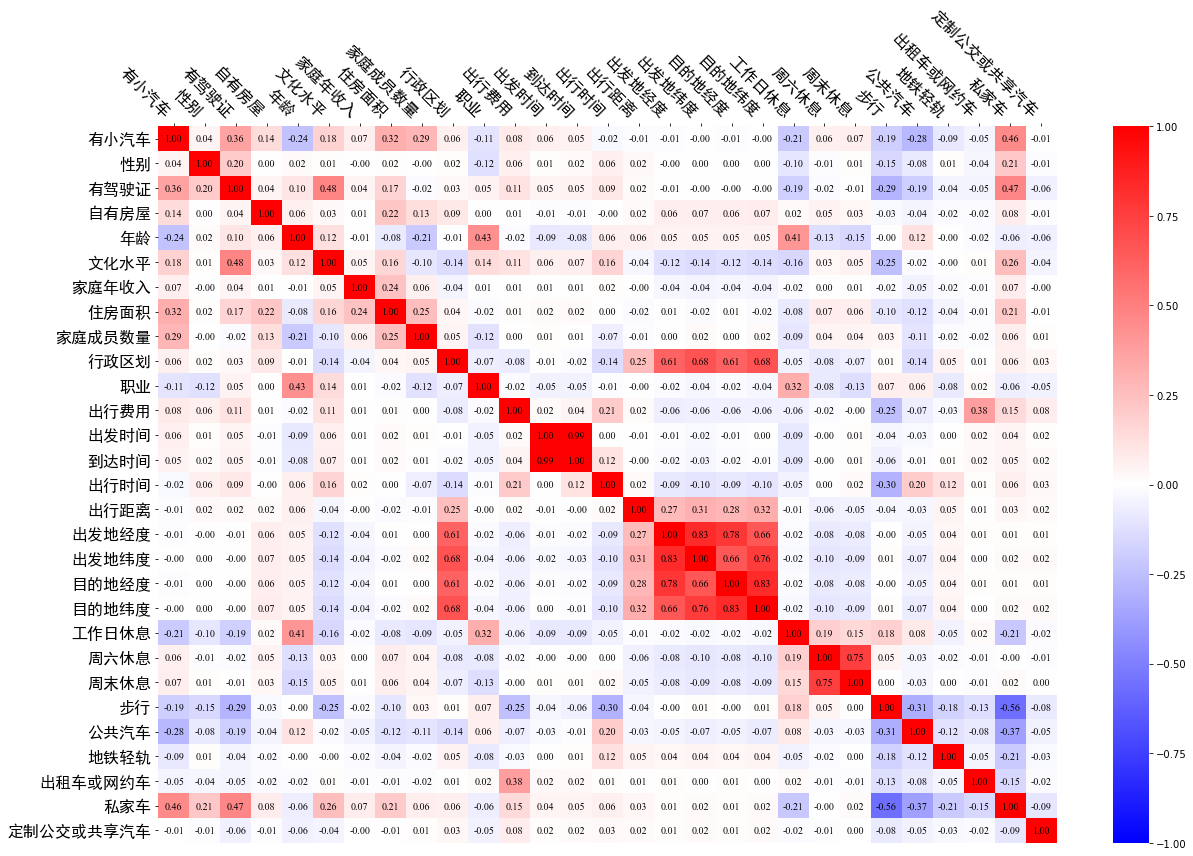

In [4]:
travel_mode = pd.get_dummies(prediction['MainTransport']).astype('int') 
travel_mode.columns = mode_columns

df_mode = df.copy()

for col in travel_mode.columns:
    df_mode[col] = travel_mode[col]
    
mode_vars = all_vars + mode_columns
mode_vars_cn = all_vars_cn + mode_columns_cn
fig, ax = plt.subplots(figsize=(18, 12))

# 'weight':'bold'
sns.heatmap(df_mode.corr(),ax=ax,cmap="bwr",vmin=-1,vmax=1,annot=True,annot_kws={'size':10,'color':'black','family':'Times New Roman'},fmt='.2f')

ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(mode_vars,family = 'Times New Roman',rotation=300,size=16,horizontalalignment='right')
ax.set_yticklabels(mode_vars,family = 'Times New Roman',size=16)

ax.set_xticklabels(mode_vars_cn,family = 'SimHei',rotation=315,size=16,horizontalalignment='right')
ax.set_yticklabels(mode_vars_cn,family = 'SimHei',size=16)

fig.tight_layout()
plt.savefig('image\\corr\\mode_corr.png',bbox_inches='tight',dpi=300)

# Purpose & Variables corr

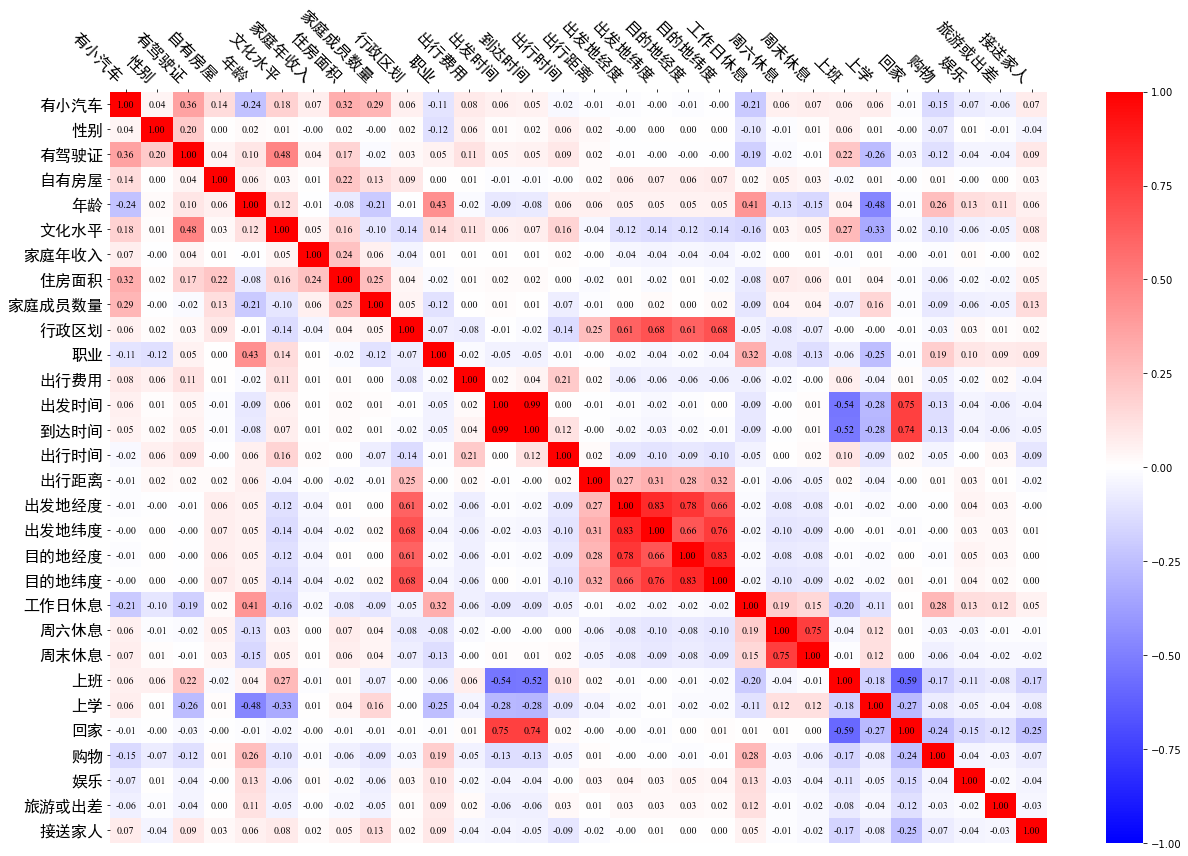

In [5]:
travel_purposes = pd.get_dummies(prediction['Travel_Purpose']).astype('int') 
travel_purposes.columns = purpose_columns

df_purpose = df.copy()
for col in travel_purposes.columns:
    df_purpose[col] = travel_purposes[col]
    
purpose_vars = all_vars + purpose_columns
purpose_vars_cn = all_vars_cn + purpose_columns_cn

fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_purpose.corr(),ax=ax,cmap="bwr",vmin=-1,vmax=1,annot=True,annot_kws={'size':10,'family':'Times New Roman','color':'black'},fmt='.2f')
ax.xaxis.set_ticks_position('top')
# ax.set_xticklabels(purpose_vars,family = 'Times New Roman',rotation=300,size=16,horizontalalignment='right')
# ax.set_yticklabels(purpose_vars,family = 'Times New Roman',size=16)

ax.set_xticklabels(purpose_vars_cn,family = 'SimHei',rotation=315,size=16,horizontalalignment='right')
ax.set_yticklabels(purpose_vars_cn,family = 'SimHei',size=16)

fig.tight_layout()
plt.savefig('image\\corr\\purpose_corr.png',bbox_inches='tight',dpi=300)

# Mode & Purpose corr

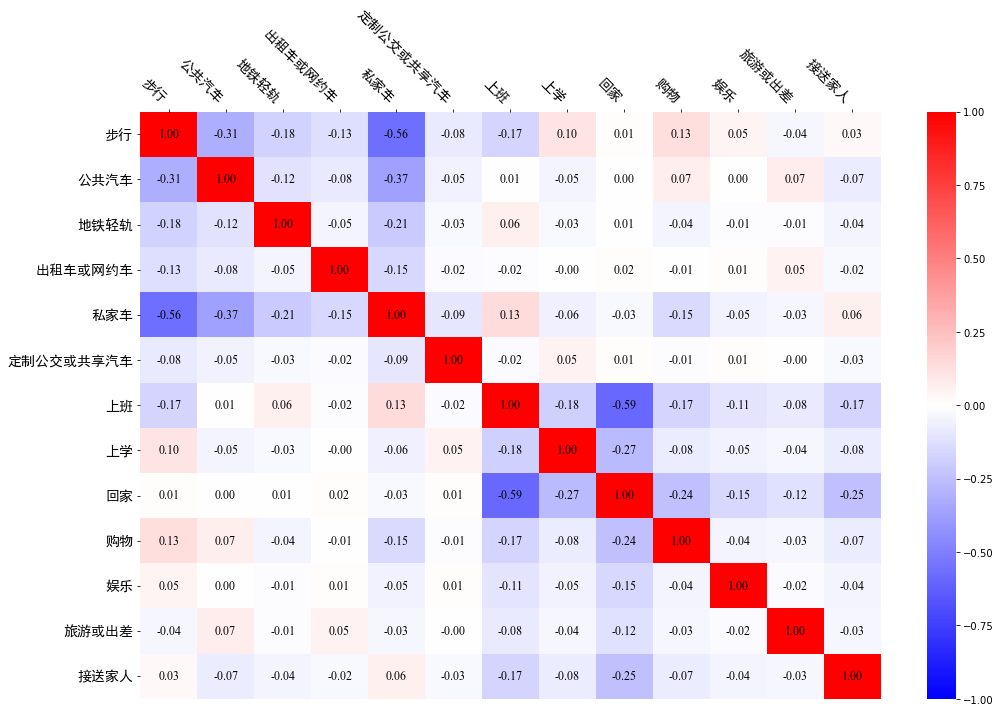

In [6]:
corr_mode_purpose = travel_mode.copy()
for col in travel_purposes.columns:
    corr_mode_purpose[col] = travel_purposes[col]

m_p_vars = mode_columns + purpose_columns
m_p_vars_cn = mode_columns_cn + purpose_columns_cn

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_mode_purpose.corr(),ax=ax,cmap="bwr",vmin=-1,vmax=1,annot=True,annot_kws={'size':12,'family':'Times New Roman','color':'black'},fmt='.2f')
ax.xaxis.set_ticks_position('top')
# ax.set_xticklabels(m_p_vars,family = 'Times New Roman',rotation=300,size=16,horizontalalignment='right')
# ax.set_yticklabels(m_p_vars,family = 'Times New Roman',size=14)

ax.set_xticklabels(m_p_vars_cn,family = 'SimHei',rotation=315,size=14,horizontalalignment='right')
ax.set_yticklabels(m_p_vars_cn,family = 'SimHei',size=14)

fig.tight_layout()
plt.savefig('image\\corr\\corr_mode_purpose.png',bbox_inches='tight',dpi=300)

# Mode & Purpose P-Test

In [7]:
cross_m_p = pd.crosstab(prediction['MainTransport'],prediction["Travel_Purpose"])
chi2, p_values, dof, expected_matrix = chi2_contingency(cross_m_p, correction=False)

print("----chi2_contingency----")
print("chi2: ", chi2)
print("p_values: ", '{:,.6f}'.format(p_values))
print("dof: ", dof)
print("expected_matrix[0]:\n", expected_matrix[0])
print("expected_matrix[1]:\n", expected_matrix[1])

----chi2_contingency----
chi2:  6099.398764850345
p_values:  0.000000
dof:  30
expected_matrix[0]:
 [ 6611.65983934  1764.52451248 10558.52099368  1476.97713477
   623.34095975   364.74130462  1543.23525536]
expected_matrix[1]:
 [3514.61462758  937.9828686  5612.68020917  785.12893412  331.35450225
  193.88854776  820.35031052]
